# Male of Female

In [97]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from mlxtend.plotting import plot_decision_regions

### Generate Data

In [98]:
height_f = np.random.normal(loc=160, scale=10, size=6000)
height_m = np.random.normal(loc=180, scale=15, size=6000)

In [99]:
hair_f = np.random.normal(loc=20, scale=10, size=6000)
hair_m = np.random.normal(loc=5, scale=2, size=6000)

In [100]:
df_m = pd.DataFrame({'hair': hair_m, 'height': height_m, 'sex': np.repeat(1, 6000)})
df_f = pd.DataFrame({'hair': hair_f, 'height': height_f, 'sex': np.repeat(0, 6000)})

In [101]:
df = pd.concat([df_m, df_f], axis=0, ignore_index=True)

In [102]:
df['hair'] = np.where(df['hair'] < 0, 0 , df['hair'])
df['height'] = np.where(df['height'] < 120, 120, df['height'] )
df['height'] = np.where(df['height'] > 220, 220, df['height'] )

In [103]:
df.describe()

,hair,height,sex
count,12000.000000,12000.000000,12000.000000
mean,12.478783,169.864658,0.500000
std,10.306535,16.171576,0.500021
min,0.000000,123.390980,0.000000
25%,4.647333,158.262048,0.000000
50%,7.497966,167.884125,0.500000
75%,19.941378,180.688034,1.000000
max,57.537197,220.000000,1.000000


In [104]:
df.groupby('sex').describe().T

sex                     0            1
hair   count  6000.000000  6000.000000
       mean     19.976694     4.980872
       std       9.798075     2.002169
       min       0.000000     0.000000
       25%      13.209768     3.576738
       50%      19.941800     4.966162
       75%      26.613929     6.335714
       max      57.537197    11.871152
height count  6000.000000  6000.000000
       mean    159.899914   179.829403
       std      10.091917    14.920161
       min     123.390980   128.060205
       25%     152.898471   169.582018
       50%     160.004709   179.965531
       75%     166.837994   190.180682
       max     194.468749   220.000000

In [105]:
X, y = df.drop(['sex'], axis=1), df['sex']

In [106]:
X_train, X_test_temp, y_train, y_test_temp = train_test_split(X, y, stratify=y,  test_size=0.4)

In [107]:
X_test, X_val, y_test, y_val = train_test_split(X_test_temp, y_test_temp, stratify=y_test_temp,  test_size=0.5)

## Build a model

In [108]:
clf = LogisticRegression()

In [109]:
clf.fit(X_train, y_train)

/home/ubuntu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [114]:
y_pred = clf.predict(X_val)

In [115]:
y_pred

array([0, 1, 0, ..., 0, 1, 0])

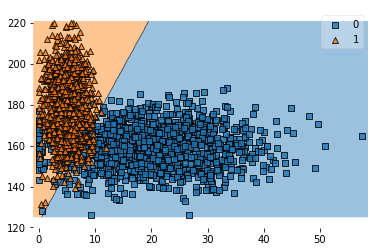

In [112]:
plot_decision_regions(X=X_val.values, y=y_val.values, clf=clf)

In [117]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.89      0.93      1200
           1       0.90      0.96      0.93      1200

   micro avg       0.93      0.93      0.93      2400
   macro avg       0.93      0.93      0.93      2400
weighted avg       0.93      0.93      0.93      2400



### distributions

In [121]:
df_test = X_test
df_test['sex'] = y_test

/home/ubuntu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


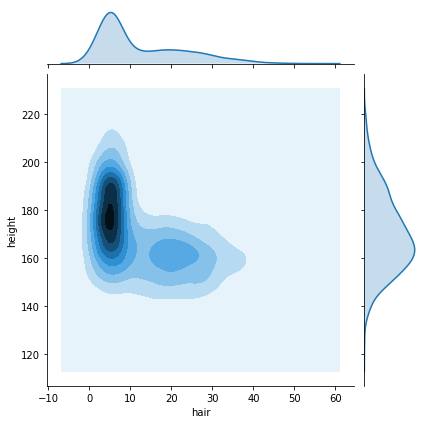

In [122]:
# p(x)
sns.jointplot(data=df_test, x='hair', y='height', kind='kde')

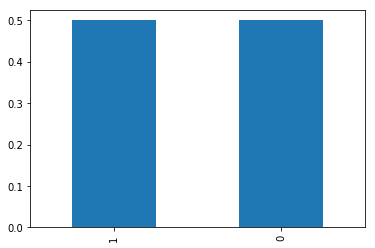

In [133]:
# p(y)
df_test['sex'].value_counts(normalize=True).plot(kind='bar')

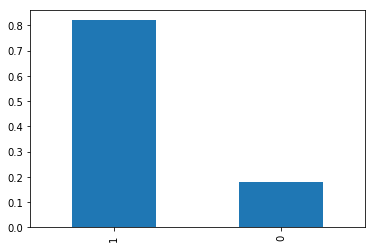

In [139]:
# p(y|height>170)
df_test[df_test['height'] > 170]['sex'].value_counts(normalize=True).plot(kind='bar')

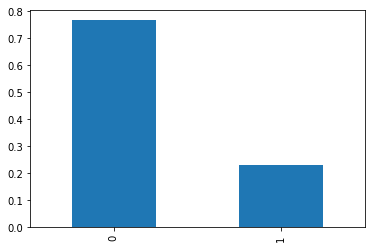

In [138]:
df_test[df_test['height'] < 170]['sex'].value_counts(normalize=True).plot(kind='bar')

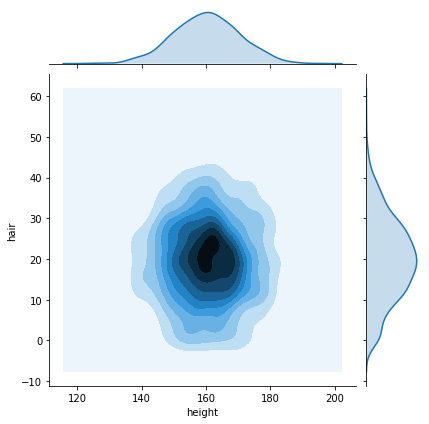

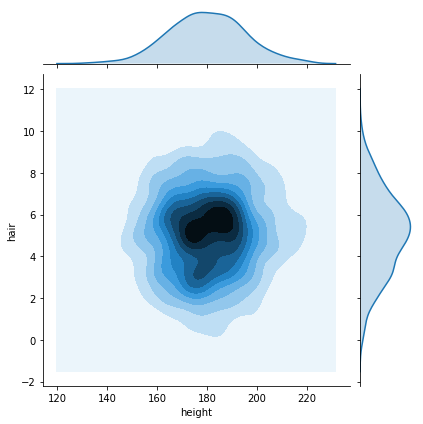

In [145]:
# p(X| y=f,m)
sns.jointplot(data=df_test[df_test['sex'] == 0], x='height', y='hair', kind='kde')
sns.jointplot(data=df_test[df_test['sex'] == 1], x='height', y='hair', kind='kde')